# Загрузка данных и первичный осмотр

1. Импортировать необходимые библиотеки

In [1]:
import pandas as pd # подключим библиотеку
import numpy as np

2. Загрузить учебный датасет в pandas.dfFrame с помощью pd.read_csv (или другого подходящего метода).

In [4]:
url = 'https://raw.githubusercontent.com/TatjanaYMIREA/aie-group-2/main/homeworks/HW02/S02-hw-dfset.csv'
df = pd.read_csv(url)
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


3. Вывести:
первые строки датасета (head()),
информацию о столбцах и типах (info()),
базовые описательные статистики (describe() или аналог).

In [3]:
print("Первые строки датасета:")
print(df.head())

print("Информация о столбцах и типах данных:")
print(df.info())

print("Описательные статистики:")
print(df.describe())

Первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
Описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.71

# Пропуски, дубликаты и базовый контроль качества

1. Посчитать долю пропусков в каждом столбце (например, через isna().mean() или аналог).
2. Проверить наличие полностью дублирующих строк (через duplicated()).
3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
* отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
* нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
* другие логические противоречия, характерные для конкретного датасета.

In [11]:
print(f"Доля пропусков в каждом столбце:\n{df.isna().mean()}\n")

print(f"Количество полностью дублирующих строк: {len(df[df.duplicated(keep=False)])}\n")

print("Подозрительные случаи:")
print(f"Отрицательные значения purchases (число покупок):\n{df[df['purchases'] < 0]}\n")
print(f"Нереалистичный возраст (>100 или <5):\n{df[(df['age'] > 100) | (df['age'] <= 5)]}\n")
print(f"Нулевые ираты при ненулевых покупках:\n{df[(df['revenue'] == 0) & (df['purchases'] > 0)]}")
print(f"Нулевые покупки при ненулевых тратах:\n{df[(df['purchases'] == 0) & (df['revenue'] >= 0)]}\n")
print(f"Пропуски в возрасте:\n {df[df['age'].isna()]}\n")

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полностью дублирующих строк: 2

Подозрительные случаи:
Отрицательные значения purchases (число покупок):
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Нереалистичный возраст (>100 или <5):
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488

Нулевые ираты при ненулевых покупках:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
Нулевые покупки при ненулевых тратах:
    user_id   age country  purchases  revenue
6         7  46.0      RU          0        0
17       18  24.0      RU          0        0
33       34  28.0      FR          0        0

Пропуски в возрасте:
     user_id  age country  purchases  revenue
4         5  NaN      DE          6  

Обнаруженные проблемы качества данных:
1. Пропущенные значения: В столбце age обнаружено 5% пропусков (2 записи из 40)
2. Дубликаты: Найдена одна полностью дублирующая строка (user_id=10), которая повторяется дважды.
3. Логические несоответствия:
* Отрицательное значение покупок (-1) у пользователя 6, что невозможно в реальности
* Нереалистичный возраст 120 лет у пользователя 6 и 5 лет у пользователя 21
* Нулевой доход при ненулевых покупках у пользователя 11 (4 покупки, 0 дохода)
* Нулевые покупки при нулевом доходе у пользователей 7, 18, 34 - это возможно для неактивных пользователей

# Базовый EDA: группировки, агрегаты и частоты

1. Посчитать частоты для одной или двух категориальных переменных (например, value_counts() для столбца с категорией/страной/классом).
2. Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby:
* например, среднее и сумму по количественным признакам в разрезе категорий.
3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [14]:
print(f"Число повторяющихся стран: {df['country'].value_counts()}")
print(f"Всего уникальных стран: {df['country'].nunique()}\n")

print("Возрастные группы:")
age_bins = [0, 18, 25, 35, 45, 60, 120]
age_labels = ['до 18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts().sort_index())

print("\nГруппировка по странам:")
country_stats = df.groupby('country', observed=True).agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

country_stats.columns = ['количество_пользователей', 'средний_возраст',
                        'средние_покупки', 'всего_покупок',
                        'средние_траты', 'всего_трат']
print(country_stats)

print("\nГруппировка по возрастным группам:")
age_group_stats = df.groupby('age_group', observed=True).agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)

age_group_stats.columns = ['количество_пользователей', 'средние_покупки', 'средние_траты']
print(age_group_stats)

Число повторяющихся стран: country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
Всего уникальных стран: 5

Возрастные группы:
age_group
до 18     1
18-25    10
26-35    10
36-45     7
46-60    10
60+       0
Name: count, dtype: int64

Группировка по странам:
         количество_пользователей  средний_возраст  средние_покупки  \
country                                                               
CN                              2            24.00             4.50   
DE                              6            34.60             6.50   
FR                             12            46.25             4.25   
RU                             13            30.08             4.77   
US                              8            36.71             4.62   

         всего_покупок  средние_траты  всего_трат  
country                                            
CN                   9        1054.00        2108  
DE                  39        1445.50        8673  
FR       

Основные наблюдения:
1. Россия (RU) - 13 пользователей и Франция (FR) - 12 пользователей составляют более 67% всей выборки
2. Наиболее представлены группы 26-35 лет (10 пользователей) и 18-25 лет (10 пользователей)
3. Пользователи из Германии (DE) имеют самые высокие средние траты (1445.50)
4. Группы 26-35 и 36-54 лет показывают самые высокие средние траты, что логично соответствует более высокой платежеспособности работоспособного населения
5. Неожиданные эффекты:
* Наличие пользователей с нереалистичным возрастом (5 и 120 лет) искажает статистику по возрастным группам
* Пользователи из США (US) имеют относительно низкие средние траты, несмотря на развитый рынок

# Визуализация данных в Matplotlib

В том же ноутбуке HW02.ipynb нужно построить как минимум:
1. Одну гистограмму для количественного признака:
* осмысленный выбор числа корзин (bins),
* подписи осей и заголовок.
2. Один боксплот (boxplot) для количественного признака:
* можно как общий, так и по группам (например, по категориям),
* подписи оси и заголовок.
3. Один scatter plot (диаграмма рассеяния) для пары количественных признаков:
* подписи обеих осей,
* заголовок,
* при желании можно добавить цвет/легенду для различения категорий.
4. Сохранить минимум один из построенных графиков в папку homeworks/HW02/figures/

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

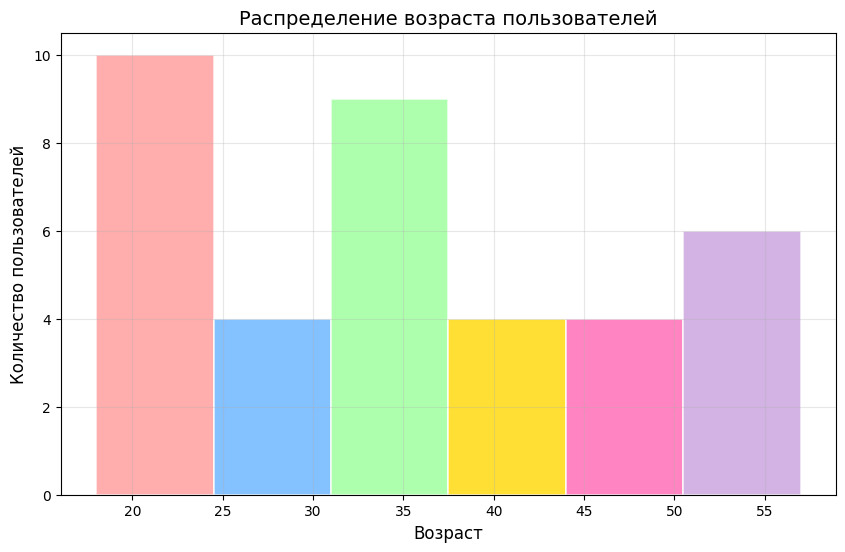

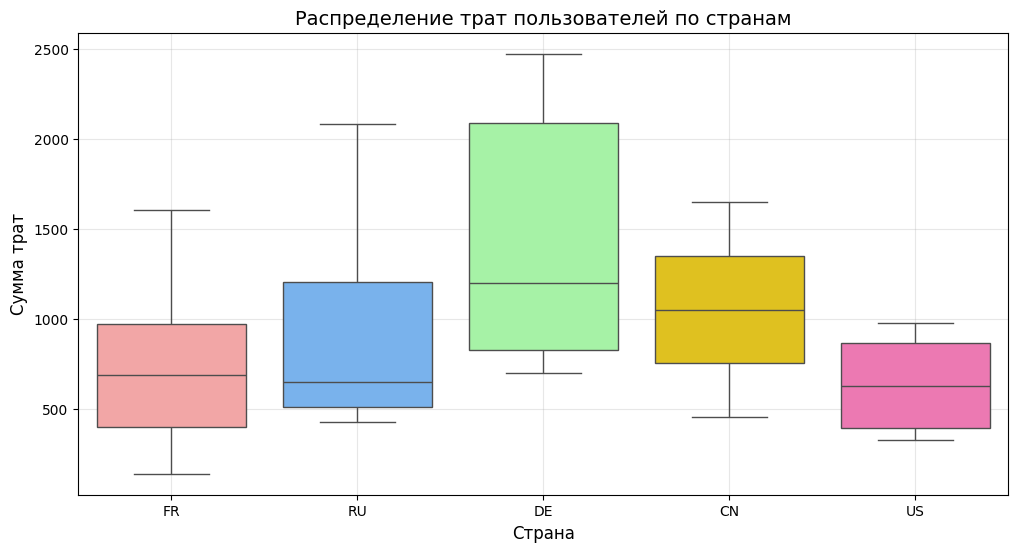

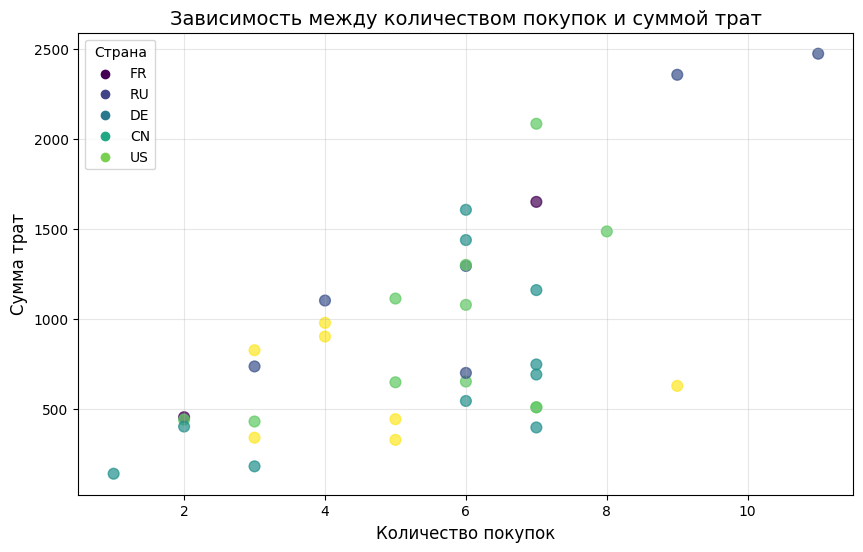

In [20]:
# 1. Гистограмма для распределения возраста
plt.figure(figsize=(10, 6))
# Исключение пропусков
age_clean = df[(df['age'].notna()) & (df['age'] <= 100) & (df['age'] >= 10)]['age']
# Автоматический выбор корзин
n_bins = int(1 + np.log2(len(age_clean)))
# Построение гистограммы
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF66B2', '#C9A0DC']
n, bins, patches = plt.hist(age_clean, bins=n_bins, edgecolor='white', alpha=0.8, linewidth=1.2)
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14)
plt.grid(True, alpha=0.3)
# Сохранение гистограммы
plt.savefig('age_distribution.png')
plt.show()

# 2. Боксплот для трат (revenue) по странам
plt.figure(figsize=(12, 6))
# Исключение нулевых и отрицательных значений
revenue_clean = df[df['revenue'] > 0]
# Построение боксплота
pastel_colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#DDA0DD', '#F0E68C']
sns.boxplot(data=revenue_clean, x='country', y='revenue', hue='country', palette=colors[:5], legend=False)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Сумма трат', fontsize=12)
plt.title('Распределение трат пользователей по странам', fontsize=14)
plt.grid(True, alpha=0.3)
# Сохранение боксплота
plt.savefig('revenue_by_country_boxplot.png')
plt.show()

# 3. Lиаграмма рассеяния: связь между количеством покупок и тратами
plt.figure(figsize=(10, 6))
# Фильтрация данных
scatter_df = df[(df['purchases'] > 0) & (df['revenue'] > 0)]
# Создание scatter plot с цветовым кодированием по странам
scatter = plt.scatter(scatter_df['purchases'],
                     scatter_df['revenue'],
                     c=pd.Categorical(scatter_df['country']).codes,
                     cmap='viridis',
                     alpha=0.7,
                     s=60)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Сумма трат', fontsize=12)
plt.title('Зависимость между количеством покупок и суммой трат', fontsize=14)
# Добавление цветовой легенды для стран
countries = scatter_df['country'].unique()
for i, country in enumerate(countries):
    plt.scatter([], [], c=[plt.cm.viridis(i/len(countries))], label=country)
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)
# Сохранение scatter plot
plt.savefig('purchases_vs_revenue_scatter.png')
plt.show()

Краткие выводы:
* Гистограмма возраста показывает, что основная аудитория - молодые пользователи 20-35 лет, что типично для многих онлайн-сервисов.
* Боксплот по странам: Германия лидирует по медианным тратам, при этом в России и Франции наблюдается большой разброс значений.
* Scatter plot подтверждает ожидаемую положительную корреляцию - чем больше покупок, тем выше общие траты, однако есть исключения, где пользователи с малым количеством покупок тратят значительные суммы (вероятно, покупают дорогие товары).